<a href="https://colab.research.google.com/github/BensonHermes/2021_1101_Data_Structure/blob/main/%5BDS%5D108307041_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import timeit
from random import randint  
import numpy as np

#1. Insert

##Hash Table

https://github.com/pagekeysolutions/education/blob/master/HashTable/hashtable.py

In [21]:
#數字最多10項->size=10
ran_lst = list(np.random.randint(50,size=10))
ran_lst

[38, 44, 15, 11, 43, 1, 10, 2, 6, 41]

In [18]:
# Node data structure - essentially a LinkedList node
class Node:
	def __init__(self, key, value):
		self.key = key
		self.value = value
		self.next = None
	def __str__(self):
		return "<Node: (%s, %s), next: %s>" % (self.key, self.value, self.next != None)
	def __repr__(self):
		return str(self)
# Hash table with separate chaining
class HashTable():
	# Initialize hash table
	def __init__(self, initCapacity):
		self.capacity = initCapacity
		self.size = 0
		self.buckets = [None]*self.capacity
	# Generate a hash for a given key
	# Input:  key - string
	# Output: Index from 0 to self.capacity
	def hash(self, key):
		hashSum = 0
		# Iterate through each int key
		for idx, num in enumerate(str(key)):
			# multiply random int and num
			hashSum += ran_lst[idx]*int(num)
			# Perform modulus to keep hashsum in range [0, self.capacity - 1]
			hashSum = hashSum % self.capacity
		return hashSum

	# Insert a key,value pair to the hashtable
	# Input:  key - string
	# 		  value - anything
	# Output: void
	def insert(self, key, value):
		# 1. Increment size
		self.size += 1
		# 2. Compute index of key
		index = self.hash(key)
		# Go to the node corresponding to the hash
		node = self.buckets[index]
		# 3. If bucket is empty:
		if node is None:
			# Create node, add it, return
			self.buckets[index] = Node(key, value)
			return
		# 4. Iterate to the end of the linked list at provided index
		prev = node
		while node is not None:
			prev = node
			node = node.next
		# Add a new node at the end of the list with provided key/value
		prev.next = Node(key, value)

	# Find a data value based on key
	# Input:  key - string
	# Output: value stored under "key" or None if not found
	def find(self, key):
		# 1. Compute hash
		index = self.hash(key)
		# 2. Go to first node in list at bucket
		node = self.buckets[index]
		# 3. Traverse the linked list at this node
		while node is not None and node.key != key:
			node = node.next
		# 4. Now, node is the requested key/value pair or None
		if node is None:
			# Not found
			return None
		else:
			# Found - return the data value
			return node.value

	# Remove node stored at key
	# Input:  key - string
	# Output: removed data value or None if not found
	def remove(self, key):
		# 1. Compute hash
		index = self.hash(key)
		node = self.buckets[index]
		prev = None
		# 2. Iterate to the requested node
		while node is not None and node.key != key:
			prev = node
			node = node.next
		# Now, node is either the requested node or none
		if node is None:
			# 3. Key not found
			return None
		else:
			# 4. The key was found.
			self.size -= 1
			result = node.value
			# Delete this element in linked list
			if prev is None:
				self.buckets[index] = node.next # May be None, or the next match
			else:
				prev.next = prev.next.next # LinkedList delete by skipping over
			# Return the deleted result 
			return result


In [19]:
def hashInsert(hashTable, i):
  for k in range(2**i):
    key = randint(1, 2**30)
    hashTable.insert(key,key)
def hashSearch(hashTable):
  for k in range(100000):
    res = hashTable.find(randint(1, 2**30))
  

In [ ]:
insertion_result=0
search_result=0
hash_insertion_result=[]
hash_search_result=[]

for i in range(10,31):
  hashTable = HashTable(2**i)  
  insertion_result = timeit.timeit(stmt='hashInsert(hashTable, i)', setup='from __main__ import hashInsert,hashTable, i', number=1)
  search_result = timeit.timeit(stmt='hashSearch(hashTable)', setup='from __main__ import hashSearch,hashTable', number=1)
  hash_insertion_result.append(insertion_result)
  hash_search_result.append(search_result)
  print(f"Insertion: {hash_insertion_result}")
  print(f"Search: {hash_search_result}")
  # print(hashTable.buckets[0])
  # print(hashTable.buckets[2])

Insertion: [0.014018643999861524]
Search: [1.2261102050001682]
Insertion: [0.014018643999861524, 0.027547835999939707]
Search: [1.2261102050001682, 1.2847654180000063]
Insertion: [0.014018643999861524, 0.027547835999939707, 0.051316810000116675]
Search: [1.2261102050001682, 1.2847654180000063, 1.2950861509998504]
Insertion: [0.014018643999861524, 0.027547835999939707, 0.051316810000116675, 0.10841673799995988]
Search: [1.2261102050001682, 1.2847654180000063, 1.2950861509998504, 1.5146873510002479]
Insertion: [0.014018643999861524, 0.027547835999939707, 0.051316810000116675, 0.10841673799995988, 0.24008086200001344]
Search: [1.2261102050001682, 1.2847654180000063, 1.2950861509998504, 1.5146873510002479, 1.8999330070000724]
Insertion: [0.014018643999861524, 0.027547835999939707, 0.051316810000116675, 0.10841673799995988, 0.24008086200001344, 0.5835213290001775]
Search: [1.2261102050001682, 1.2847654180000063, 1.2950861509998504, 1.5146873510002479, 1.8999330070000724, 2.886799534000147]


#Insertion Result

In [48]:
hash_table=[0.014018643999861524, 0.027547835999939707, 0.051316810000116675, 0.10841673799995988, 0.24008086200001344, 0.5835213290001775, 1.6365366759996505, 5.155196441000044, 18.236307561000103, 70.09771164299991, 284.0768504169996, 1194.210399468]
skip_list=[0.020601822000116954,0.030961246000060783,0.061286244000257284,0.14223762099982196,0.29320965799979604,0.6514170239997839,1.4120556410002791,2.897249030999774,6.347698308999952,13.87970051100001,28.812510271000065,61.32111035600019,134.44714336900006,293.356273849,635.6528700719996,1400.6854010029997]
treap = [0.015426907999426476, 0.03900058599992917, 0.07026622499961377, 0.15945797699987452, 0.3550801790006517, 0.7318713399999979, 1.5999339250001867, 3.417615006000233, 7.880661983000209, 16.646020531999966, 34.87037629699989, 78.21176222600025, 162.1653033419998, 343.70393793399944, 733.7575794909999]
sorted_arr=[0.06494931599991105, 0.28286422999917704, 0.9970386259992665, 4.050502915000834, 15.455861664000622, 64.80820068299909, 252.9835937910011, 1111.744209751001]


In [49]:
print("Assumption for insertion")
sum=0.0
for i in range(len(sorted_arr)-1):
  sum+=sorted_arr[i+1]/sorted_arr[i]
sorted_average = sum/(len(sorted_arr)-1)
print(f"sorted_arr: {sorted_average}")

sum=0.0
for i in range(len(treap)-1):
  sum+=treap[i+1]/treap[i]
treap_average = sum/(len(treap)-1)
print(f"treap: {treap_average}")

sum=0
for i in range(len(skip_list)-1):
  sum+=skip_list[i+1]/skip_list[i]
sl_average = sum/(len(skip_list)-1)
print(f"skip p=0.5: {sl_average}")

sum=0
for i in range(len(hash_table)-1):
  sum+=hash_table[i+1]/hash_table[i]
hash_average = sum/(len(hash_table)-1)
print(f"hash table: {hash_average}")


Assumption for insertion
sorted_arr: 4.035641471514532
treap: 2.163775608936454
skip p=0.5: 2.108813301765052
hash table: 2.9252665500642308


In [50]:
while(len(skip_list)!=21):
  skip_list.append(skip_list[len(skip_list)-1]*sl_average)

while(len(hash_table)!=21):
  hash_table.append(hash_table[len(hash_table)-1]*hash_average)

while(len(treap)!=21):
  treap.append(treap[len(treap)-1]*treap_average)

while(len(sorted_arr)!=21):
  sorted_arr.append(sorted_arr[len(sorted_arr)-1]*sorted_average)


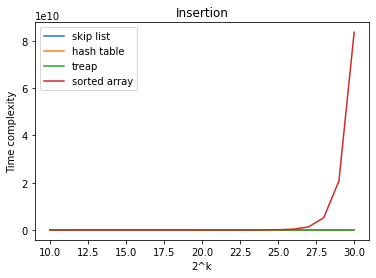

In [51]:
insertion_df = pd.DataFrame({
    'skip list':skip_list,
    'hash table ':hash_table,
    'treap':treap,
    'sorted array':sorted_arr
})
insertion_df.index = np.arange(10, len(insertion_df)+10)
insertion_df.plot(xlabel='2^k', ylabel='Time complexity', title='Insertion')

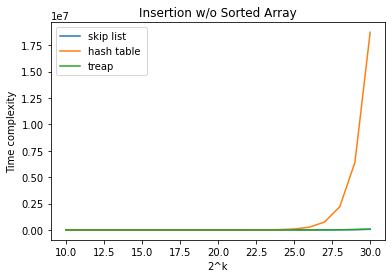

In [29]:
insertion_df_1 = pd.DataFrame({
    'skip list':skip_list,
    'hash table ':hash_table,
    'treap':treap
    # 'sorted array':sorted_arr
})
insertion_df_1.index = np.arange(10, len(insertion_df)+10)
insertion_df_1.plot(xlabel='2^k', ylabel='Time complexity', title='Insertion w/o Sorted Array')

In [52]:
insertion_df.to_csv("result_1.dat", sep = "|")

#Search

In [43]:
hash_table=[1.2261102050001682, 1.2847654180000063, 1.2950861509998504, 1.5146873510002479, 1.8999330070000724, 2.886799534000147, 4.940729890000057, 9.116807535000135, 17.986874828000055, 36.563442141999985, 80.48066596199988, 160.1253794409995]
skip_search_result = [0.24715227900014725, 0.24988021399985882, 0.24469278600008693, 0.24673226900085865, 0.2441442780000216, 0.24888674400062882, 0.26855766999869957, 0.2906180080008198, 0.3268199129997811, 0.43273116299860703, 0.714413080999293, 1.1435030840002582, 2.691879064001114, 5.148846267000408, 13.046779455999058]
treap = [0.4029132079995179, 0.48605569299979834, 0.47829655000077764, 0.6042917159993522, 0.7016972989995338, 0.8170248410006025, 0.9255230910002865, 1.047955385000023, 1.2415299429994775, 1.383768393000537, 1.4555878040000607, 1.5702693269995507, 1.7573300249996464, 1.8030210819997592, 1.9849246639996636]
sorted_arr=[1.2284938151824463, 1.3671993766220112, 1.4338496552882134, 1.5282357115465857, 1.6715551820379915, 1.7822442697106453, 1.8945900236321904, 2.0054264361788228, 2.1207606010320887, 2.219414040351694, 2.4298385391339252, 2.45432539741887, 2.5555496182387287, 2.660337066688953, 2.7353577035974013, 2.9066752710132278, 3.070480190581293, 3.156345647352282, 3.252424827474897, 3.3022113460356195]

In [44]:
print("Assumption for search")
sum=0.0
for i in range(len(sorted_arr)-1):
  sum+=sorted_arr[i+1]/sorted_arr[i]
sorted_average = sum/(len(sorted_arr)-1)
print(f"sorted_arr: {sorted_average}")

sum=0.0
for i in range(len(treap)-1):
  sum+=treap[i+1]/treap[i]
treap_average = sum/(len(treap)-1)
print(f"treap: {treap_average}")

sum=0
for i in range(len(skip_search_result)-1):
  sum+=skip_search_result[i+1]/skip_search_result[i]
sl_average = sum/(len(skip_search_result)-1)
print(f"skip p=0.5: {sl_average}")

sum=0
for i in range(len(hash_table)-1):
  sum+=hash_table[i+1]/hash_table[i]
hash_average = sum/(len(hash_table)-1)
print(f"hash table: {hash_average}")


Assumption for search
sorted_arr: 1.0537412310528744
treap: 1.1228876785789978
skip p=0.5: 1.4049743582703684
hash table: 1.6138528136143895


In [45]:
while(len(skip_search_result)!=21):
  skip_search_result.append(skip_search_result[len(skip_search_result)-1]*sl_average)

while(len(hash_table)!=21):
  hash_table.append(hash_table[len(hash_table)-1]*hash_average)

while(len(treap)!=21):
  treap.append(treap[len(treap)-1]*treap_average)

while(len(sorted_arr)!=21):
  sorted_arr.append(sorted_arr[len(sorted_arr)-1]*sorted_average)


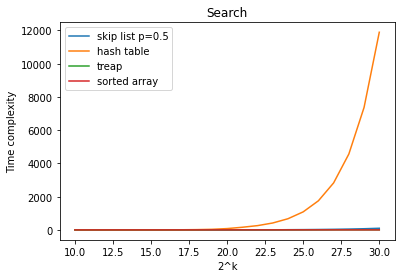

In [46]:
search_df = pd.DataFrame({
    'skip list p=0.5':skip_search_result,
    'hash table':hash_table,
    'treap':treap,
    'sorted array':sorted_arr
})
search_df.index = np.arange(10, len(search_df)+10)
search_df.plot(xlabel='2^k', ylabel='Time complexity', title='Search')

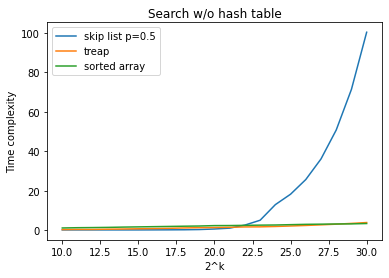

In [35]:
search_df = pd.DataFrame({
    'skip list p=0.5':skip_search_result,
    # 'hash table':hash_table,
    'treap':treap,
    'sorted array':sorted_arr
})
search_df.index = np.arange(10, len(search_df)+10)
search_df.plot(xlabel='2^k', ylabel='Time complexity', title='Search w/o hash table')

In [47]:
search_df.to_csv("result_2.dat", sep = "|")

#trial

In [22]:
insertion_result=0
search_result=0
hash_insertion_result=[]
hash_search_result=[]
hashTable = HashTable(2**10) 
for i in range(10,11):
  insertion_result = timeit.timeit(stmt='hashInsert(hashTable, i)', setup='from __main__ import hashInsert,hashTable, i', number=1)
  search_result = timeit.timeit(stmt='hashSearch(hashTable)', setup='from __main__ import hashSearch,hashTable', number=1)
  hash_insertion_result.append(insertion_result)
  hash_search_result.append(search_result)
  print(f"Insertion: {hash_insertion_result}")
  print(f"Search: {hash_search_result}")
  print(hashTable.buckets[0])
  print(hashTable.buckets[2])

Insertion: [0.016639352000083818]
Search: [1.2568576730000132]
None
None


In [ ]:
print(hashTable.buckets[4].next)

<Node: (590006726, 590006726), next: False>


In [23]:
hashTable.capacity

1024

In [24]:
for i in range(hashTable.capacity):
  print(i,": ",hashTable.buckets[i])

0 :  None
1 :  None
2 :  None
3 :  None
4 :  <Node: (999014824, 999014824), next: False>
5 :  None
6 :  <Node: (279399731, 279399731), next: False>
7 :  <Node: (387482542, 387482542), next: False>
8 :  None
9 :  None
10 :  <Node: (569294044, 569294044), next: False>
11 :  <Node: (571684558, 571684558), next: False>
12 :  <Node: (892633558, 892633558), next: True>
13 :  None
14 :  <Node: (366891575, 366891575), next: True>
15 :  <Node: (873750476, 873750476), next: True>
16 :  None
17 :  None
18 :  <Node: (941494317, 941494317), next: False>
19 :  <Node: (738980731, 738980731), next: False>
20 :  <Node: (593283017, 593283017), next: True>
21 :  <Node: (846872741, 846872741), next: False>
22 :  <Node: (942691204, 942691204), next: True>
23 :  None
24 :  None
25 :  <Node: (682270619, 682270619), next: False>
26 :  None
27 :  <Node: (980850333, 980850333), next: False>
28 :  <Node: (922695975, 922695975), next: True>
29 :  None
30 :  <Node: (385197853, 385197853), next: False>
31 :  None
3

In [ ]:

# Capacity for internal array
INITIAL_CAPACITY = 50

# Node data structure - essentially a LinkedList node
class Node:
	def __init__(self, key, value):
		self.key = key
		self.value = value
		self.next = None
	def __str__(self):
		return "<Node: (%s, %s), next: %s>" % (self.key, self.value, self.next != None)
	def __repr__(self):
		return str(self)
# Hash table with separate chaining
class HashTable:
	# Initialize hash table
	def __init__(self):
		self.capacity = INITIAL_CAPACITY
		self.size = 0
		self.buckets = [None]*self.capacity
	# Generate a hash for a given key
	# Input:  key - string
	# Output: Index from 0 to self.capacity
	def hash(self, key):
		hashSum = 0
		# Iterate through each int key
		for idx, num in enumerate(str(key)):
			# multiply random int and num
			hashSum += ran_lst[idx]*int(num)
			# Perform modulus to keep hashsum in range [0, self.capacity - 1]
			hashSum = hashSum % self.capacity
		return hashSum

	# Insert a key,value pair to the hashtable
	# Input:  key - string
	# 		  value - anything
	# Output: void
	def insert(self, key, value):
		# 1. Increment size
		self.size += 1
		# 2. Compute index of key
		index = self.hash(key)
		# Go to the node corresponding to the hash
		node = self.buckets[index]
		# 3. If bucket is empty:
		if node is None:
			# Create node, add it, return
			self.buckets[index] = Node(key, value)
			return
		# 4. Iterate to the end of the linked list at provided index
		prev = node
		while node is not None:
			prev = node
			node = node.next
		# Add a new node at the end of the list with provided key/value
		prev.next = Node(key, value)

	# Find a data value based on key
	# Input:  key - string
	# Output: value stored under "key" or None if not found
	def find(self, key):
		# 1. Compute hash
		index = self.hash(key)
		# 2. Go to first node in list at bucket
		node = self.buckets[index]
		# 3. Traverse the linked list at this node
		while node is not None and node.key != key:
			node = node.next
		# 4. Now, node is the requested key/value pair or None
		if node is None:
			# Not found
			return None
		else:
			# Found - return the data value
			return node.value

	# Remove node stored at key
	# Input:  key - string
	# Output: removed data value or None if not found
	def remove(self, key):
		# 1. Compute hash
		index = self.hash(key)
		node = self.buckets[index]
		prev = None
		# 2. Iterate to the requested node
		while node is not None and node.key != key:
			prev = node
			node = node.next
		# Now, node is either the requested node or none
		if node is None:
			# 3. Key not found
			return None
		else:
			# 4. The key was found.
			self.size -= 1
			result = node.value
			# Delete this element in linked list
			if prev is None:
				self.buckets[index] = node.next # May be None, or the next match
			else:
				prev.next = prev.next.next # LinkedList delete by skipping over
			# Return the deleted result 
			return result
